# Simulating Brownian Motion of a Microparticle in Water 
#### Author: Jaime Sabal
#### Date: 20/07/20

### Introduction:

A microparticle suspended in water is subject to a fluctuating force caused by collisions with the surrounding molecules in the fluid, which, in turn, causes it to present Brownian motion dependent on the temperature and the viscosity of the fluid. When evaluating the equation of motion of a particle in a fluid such as water, it is necessary to take this randomness into account. The Langevin equation expressed below precisely does so for a particle of mass m[1]:

$$ m\frac{d^{2}}{dt^{2}}r(t) = -\gamma\frac{d}{dt}r(t) + \chi(t) \tag{1} $$

where $r(t)$ is the position of the particle at time $t$, $\gamma$ is the particle friction coefficient given by Stoke's theorem for a spherical particle of radius $a$ in a fluid with viscosity $\eta$:

$$ \gamma = 6\pi\eta a \tag{2}$$ 

and $\chi(t) = \sqrt{2k_{B}T\gamma} W(t)$ is the fluctuating force due to random impulses from the neighbouring fluid molecules; $W(t)$ is the white noise, $k_{B}$ is Boltzmann's constant and $T$ is the absolute temperature. 

A microparticle in water is usually considered to be in a low Reynolds number regime due to large viscous forces compared to inertial forces. Hence, the first term in Eq. 1 can be ignored and we are left with the final equation of motion:

$$ \frac{d}{dt}r(t) = \sqrt{2D} W(t) \tag{3} $$

where $D = \frac{k_{B}T}{\gamma}$. 

The solution to the above differential equation is called a random walk, and can be acquired through a finite difference equation. The procedure behind this approach is taken from Euler's method (first-order integration). In terms of the finite differences, we arrive to the solution of Eq. 3 iteratively through: 

$$ x_{i} = x_{i-1}+ \sqrt{2D \Delta t} w_{i} \tag{4}$$

where $\Delta t$ is the time step taken between consecutive iterations. This equation is a good approximation for Brownian diffusive motion, which is what a microparticle in a fluid would undergo, since each collision alters the particles velocity and drifts it in a random direction. It is worth noting that this equation is only a good approximation for long time steps $\Delta t >> \tau_{trans}$, where $\tau_{trans}=\frac{m}{\gamma}$ is the time scale of the transition between smooth ballistic behaviour to diffusive behaviour. However, in the case of a microparticle of mass $m\sim 1\mu kg$, this time scale is calculated to be $\tau_{trans}=59.61s$, and thus since $\Delta t$ is most usually $\leq 0.1$ this approximation applies.

In order to acquire the solution, we must generate a sequence of $w_{i}$ of uncorrelated Gaussian random numbers that have the same properties as $W(t)$ (i.e have zero mean and unitary variance), and then rescale $w_{i}$ to obtain the sequence $W_{i}=\frac{w_{i}}{\sqrt{\Delta t}}$ that has variance $\frac{1}{\sqrt{\Delta t}}$ [2]. To do this, we will use the `numpy` library and its `random.normal` function when defining our function to generate brownian motion in both one and two dimensions.

### Import Necessary Libraries

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Defining Necessary Constants:

In [2]:
kb = 1.38064852e-23 #Boltzmann constant (m^2*kg*s^(-2)*K^(-1))
T = 298 #absolute temperature (Kelvin, eq. to 25 deg Celsius)
m = 1e-14 #mass of microparticle (kg)
a = 1e-06 #microparticle radius (meters)
eta = 8.9e-04 #fluid viscosity (Pa*s)
gamma = 6*np.pi*eta*a #particle friction coefficient 

tau_trans = m/gamma #time scale of transition between ballistic and diffusive behaviour (sec)
D = (kb*T)/gamma #constant used in brownian motion calculation

### Defining Function for Brownian Motion in 1D:

In [3]:
def brownian_motion1D(T_initial,T_final,N):
    """Simulates brownian motion in one dimension.
    Parameters:
    T_initial (float/int): time at which particle movement begins.
    T_final (float/int): time at which particle movement ends.
    N (int): number of discrete time steps.
    
    Output: 
    brownian_array (1D NumPy array): array of values for the Brownian motion of a microparticle.
    rand_norm_array (1D NumPy array): array of random values that follow a Gaussian
                                     distribution.
    """
    dt = (T_final-T_initial)/N #time step size
    
    #w, array of random normally distributed numbers with variance 1/dt (st.dev= 1/sqrt(dt))
    #multiplied by an additional factor to get in units of micrometers.
    rand_norm_array = np.sqrt(2*D*dt)*np.random.normal(0,1/np.sqrt(dt),N)
    
    brownian_array = [0] #initialise array for brownian motion with initial condition x(t=0)=0
    
    #loop over all random values
    for i in range(N-1):
        brownian_array.append(brownian_array[i]+rand_norm_array[i])
        
    return brownian_array, rand_norm_array

### Plotting Brownian Motion of Microparticle in 1D and Random Increments for Different Step Sizes

<IPython.core.display.Javascript object>


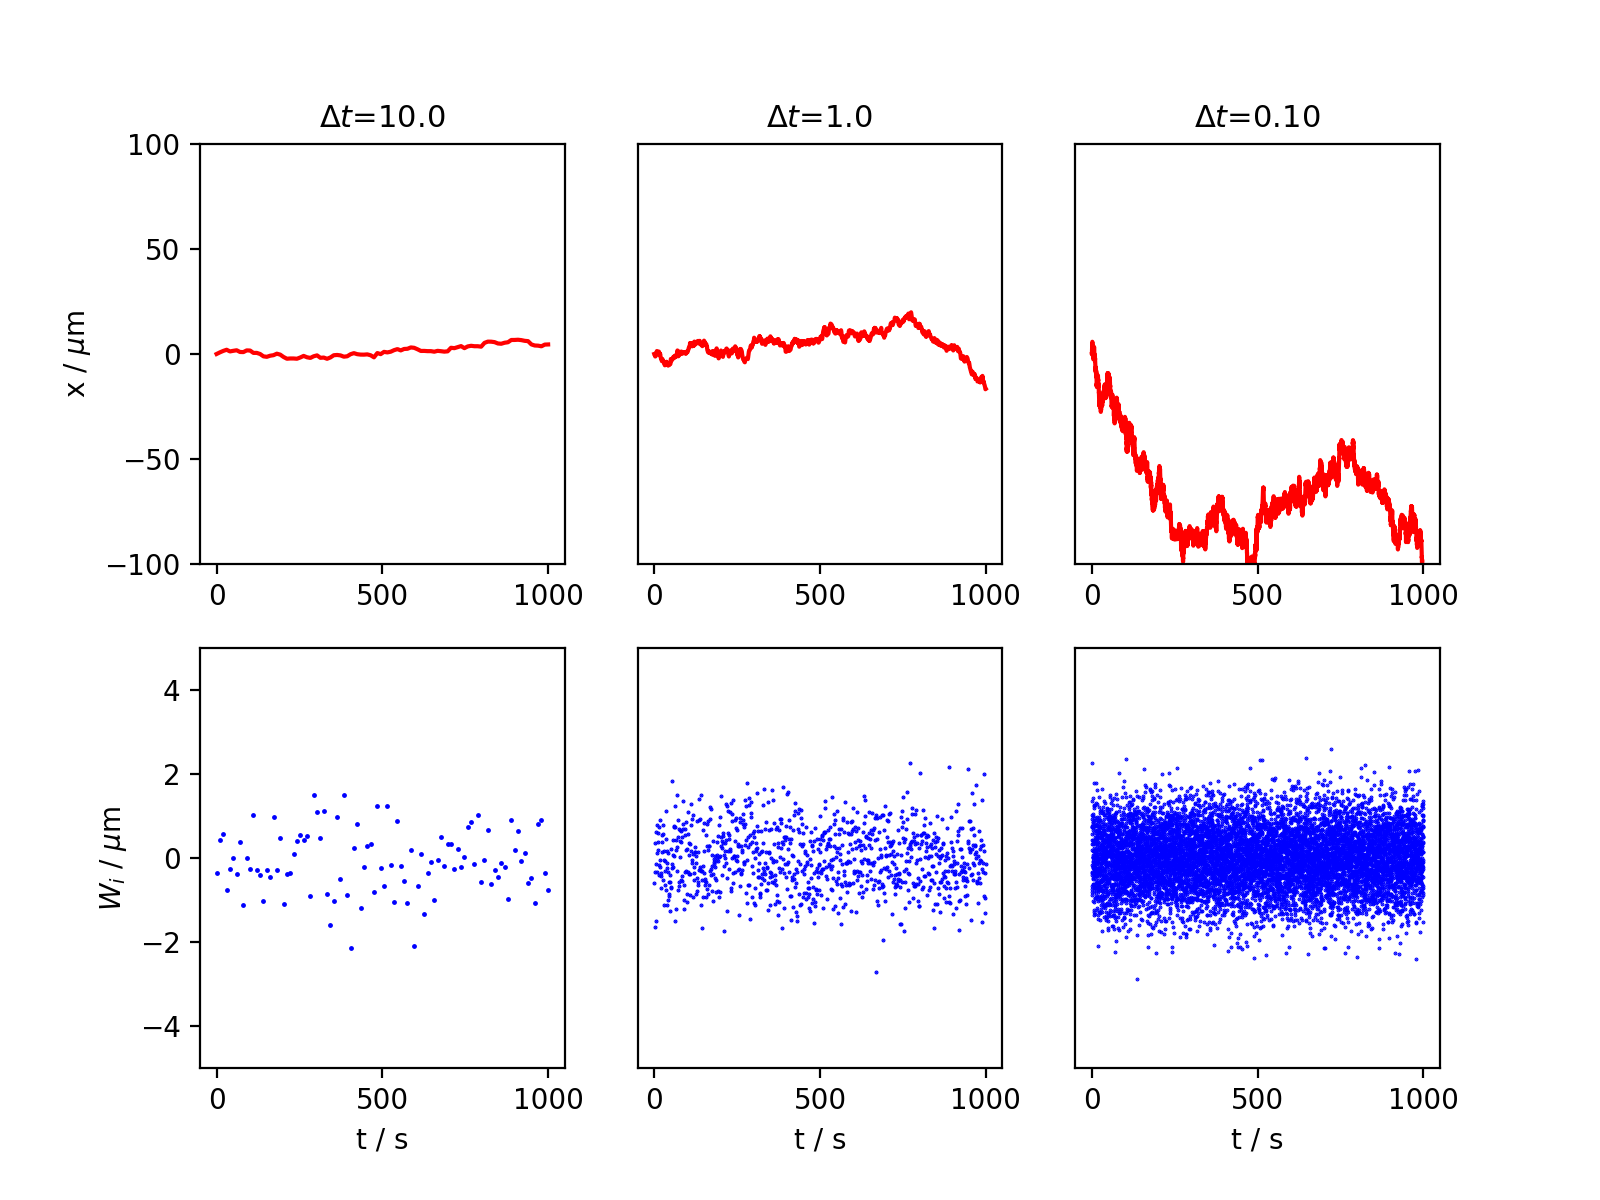

In [4]:
#discrete time steps
N_array = [100,1000,10000]

T_initial = 0 #initial time
T_final = 1000 #time at which movement ends
t = [np.linspace(T_initial,T_final,N) for N in N_array] #array of time arrays for different N

#array of arrays describing motion of microparticle with different time steps
x_arrays = [np.asarray(brownian_motion1D(T_initial,T_final,N)[0])*1e06 for N in N_array]

#arrays of random increments in particle position for different time steps
w_arrays = [np.asarray(brownian_motion1D(T_initial,T_final,N)[1])*1e06 for N in N_array]

#add figure to plot on
fig = plt.figure(figsize=(8,6))

#1D brownian motion subplot, N=50
ax1 = fig.add_subplot(231) 
ax1.plot(t[0],x_arrays[0], "r")
ax1.set_ylim(-100,100)
ax1.set_title("$\Delta t$=%0.1f"%((T_final-T_initial)/N_array[0]), fontsize=11)
ax1.set_ylabel("x / $\mu$m")

#1D brownian motion subplot, N=250
ax2 = fig.add_subplot(232) 
ax2.plot(t[1],x_arrays[1], "r")
ax2.set_yticks([])
ax2.set_ylim(-100,100)
ax2.set_title("$\Delta t$=%0.1f"%((T_final-T_initial)/N_array[1]), fontsize=11)

#1D brownian motion subplot, N=1250
ax3 = fig.add_subplot(233) 
ax3.plot(t[2],x_arrays[2], "r")
ax3.set_yticks([])
ax3.set_ylim(-100,100)

ax3.set_title("$\Delta t$=%0.2f"%((T_final-T_initial)/N_array[2]), fontsize=11)

ax4 = fig.add_subplot(234) #1D random increments of particle subplot, N=100
ax4.plot(t[0],w_arrays[0], "b.", markersize=1.5)
ax4.set_ylim(-5,5)
ax4.set_xlabel("t / s")
ax4.set_ylabel(r"$W_{i}$ / $\mu$m")


ax5 = fig.add_subplot(235) #1D random increments of particle subplot, N=1000
ax5.plot(t[1],w_arrays[1], "b.", markersize=0.9)
ax5.set_ylim(-5,5)
ax5.set_yticks([])
ax5.set_xlabel("t / s")


ax6 = fig.add_subplot(236) #1D random increments of particle subplot, N=10000
ax6.plot(t[2],w_arrays[2], "b.", markersize=0.8)
ax6.set_ylim(-5,5)
ax6.set_yticks([])
ax6.set_xlabel("t / s");
#plt.savefig("Brownian1D.png")

As can be seen in the top three plots above the brownian motion, x(t), of the microparticle in water is shown. The bottom three plots show $W_{i}$, where it can be seen how the random increments increase in magnitude as $\Delta t$ decreases. This is due to the fact that the variance of these random increments is dependent on the step size by $\frac{1}{\Delta t}$, and thus diverges as $\Delta t \longrightarrow \infty$.

### Mean Square Displacement in 1D:

Now that we have plotted the Brownian motion of the microparticle in 1D, it is also interesting to look at the mean square displacement (MSD) of the particle. The MSD quantifies how much a particle moves away from its initial position. It is calculated by the equation [1]:

$$ \mathsf{M}\mathsf{S}\mathsf{D} = \langle (x(t+\tau)-x(t))^{2} \rangle \tag{5}$$

where $x(t+\tau)-x(t)$ is the displacement of the particle in a time interval (delay) $\tau$. This delay corresponds to an index shift $n=\frac{\tau}{\Delta t}$ in our data array.

In the cell below we define a function that returns the mean square displacement for a particle undergoing Brownian motion. We then plot the MSD as a function of $\tau$. According to [1], the MSD for a particle's trajectory in one spatial dimension should be linear with $\tau$:

$$ \mathsf{M}\mathsf{S}\mathsf{D} = 2D\tau \tag{6} $$

where $D$ is the diffusion coefficient. In terms of calculating the error in the MSD, H. Qian et al (1991) [3] provides a good analysis that we can use to determine the maximum stochastic error for each delay. The worst-case stochastic error for the MSD of a position array with $N$ data points, calculated through a shift $n$ in our array due to a delay $\tau$, is:

$$ \Delta < 2Dn\Delta t \left[ \frac{2n}{3(N-n+1)} \right]^{1/2} \tag{7}$$



In [5]:
def MSD_1D(x_array,tau,dt):
    """Gives the 1D mean square displacement for a particle undergoing Brownian motion.
    Parameters:
    x_array (1D_NumPy array): array of particle positions.
    tau (int): time delay taken in calculation of MSD. tau <= (T_final-T_initial).
    dt (float): time step taken between particle movements.
    
    Output:
    MSD_theo (float): mean square displacement (meters).
    MSD_theo (float): theoretical mean square displacement (µm^2).
    error_MSD (float): error in the experimental MSD (µm^2).
    """
    
    #shift in data accounting for delay
    shift = int(np.floor(tau/dt))
    
    #create an array shifted by amount corresponding to delay
    shifted_array = np.empty_like(x_array)
    shifted_array[-shift:] = np.nan
    shifted_array[:-shift] = x_array[shift:]
    
    #difference squared
    diff_sq = np.square(x_array-shifted_array)
    
    #mean square dispalcement, calculated and theoretical
    MSD_exp = np.nanmean(diff_sq)
    MSD_theo = 2*D*tau*1e12
    
    #error in MSD
    error_MSD = 2*D*shift*dt*(np.sqrt((2*shift)/(3*(len(x_array)-shift+1))))*1e12
    
    return MSD_exp,MSD_theo,error_MSD

<IPython.core.display.Javascript object>


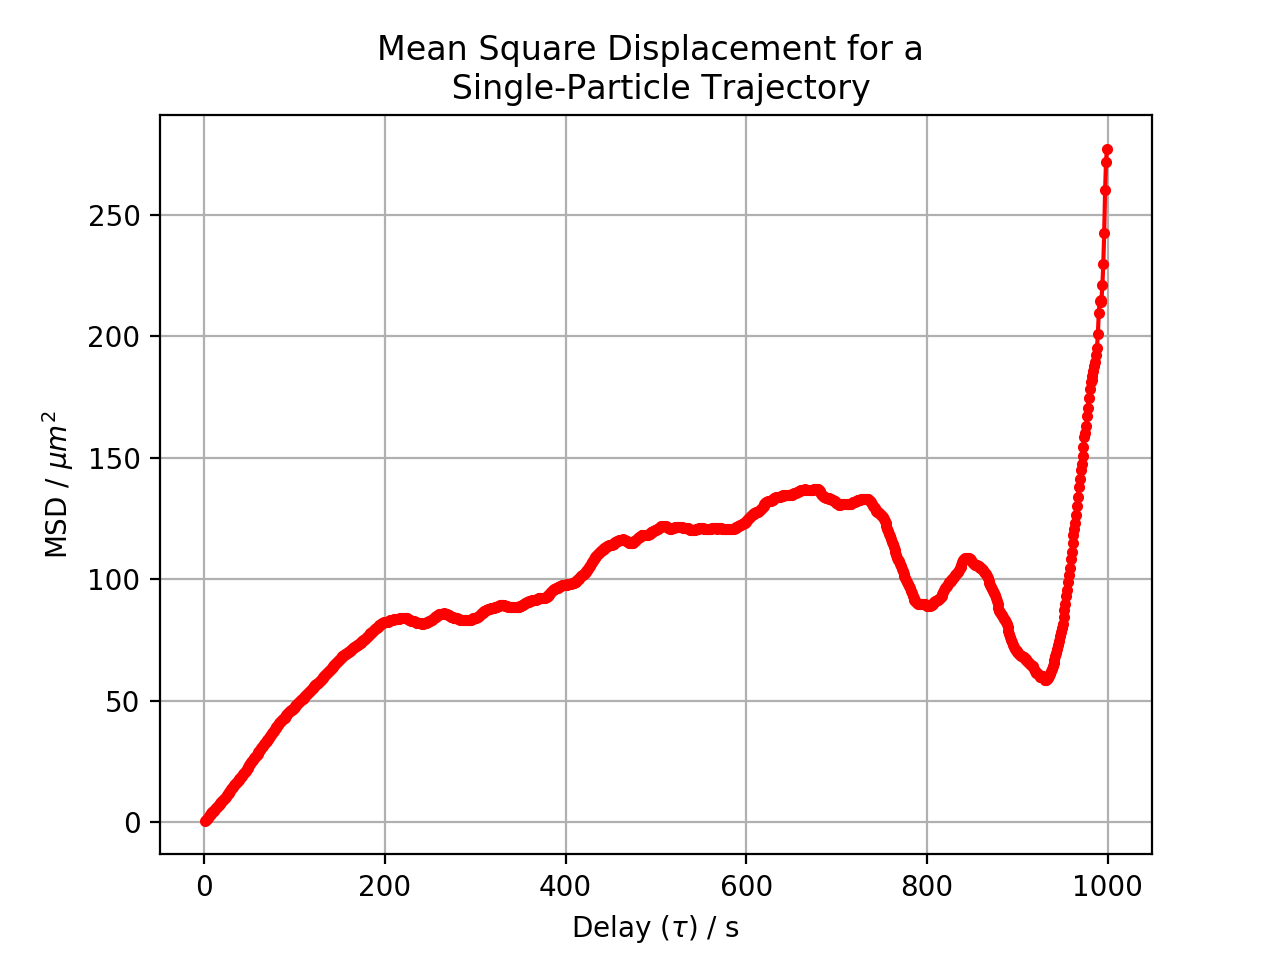

In [6]:
#make tau array for N=1000
dt = (T_final-T_initial)/len(x_arrays[1])
tau_array_MSD = np.arange(dt,T_final-T_initial,dt)

#MSD arrays for different values of T
MSD_exp_array1 = [MSD_1D(x_arrays[1],tau,dt)[0] for tau in tau_array_MSD]  

#make new figure and plot MSD against tau
plt.figure()
plt.grid()
plt.title("Mean Square Displacement for a \n Single-Particle Trajectory")
plt.plot(tau_array_MSD,MSD_exp_array1, "r.-")
plt.xlabel(r"Delay ($\tau$) / s")
plt.ylabel("MSD / $\mu m^{2}$");
#plt.savefig("MSD_1D.png")

### Discussion:
From the plot above, we observe how the calculated MSD shows an positive trend for small values of delay but this behaviour changes for large values of $\tau$. The reason for this is that as values for the delay become larger, there is less and less data to compute the mean square displacement and thus the error becomes very large. Therefore, the MSD computed here becomes meaningless for single-particle trajectories for large values of $\tau$.

In order to fix this issue to a large extent we can take the average MSD for each value of $\tau$ over more than just one single-particle trajectory. For time-efficiency purposes, we will use 100 of these trajectories to calculate an average MSD and plot it again against the delay. 

/Users/jaimesabal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


<IPython.core.display.Javascript object>


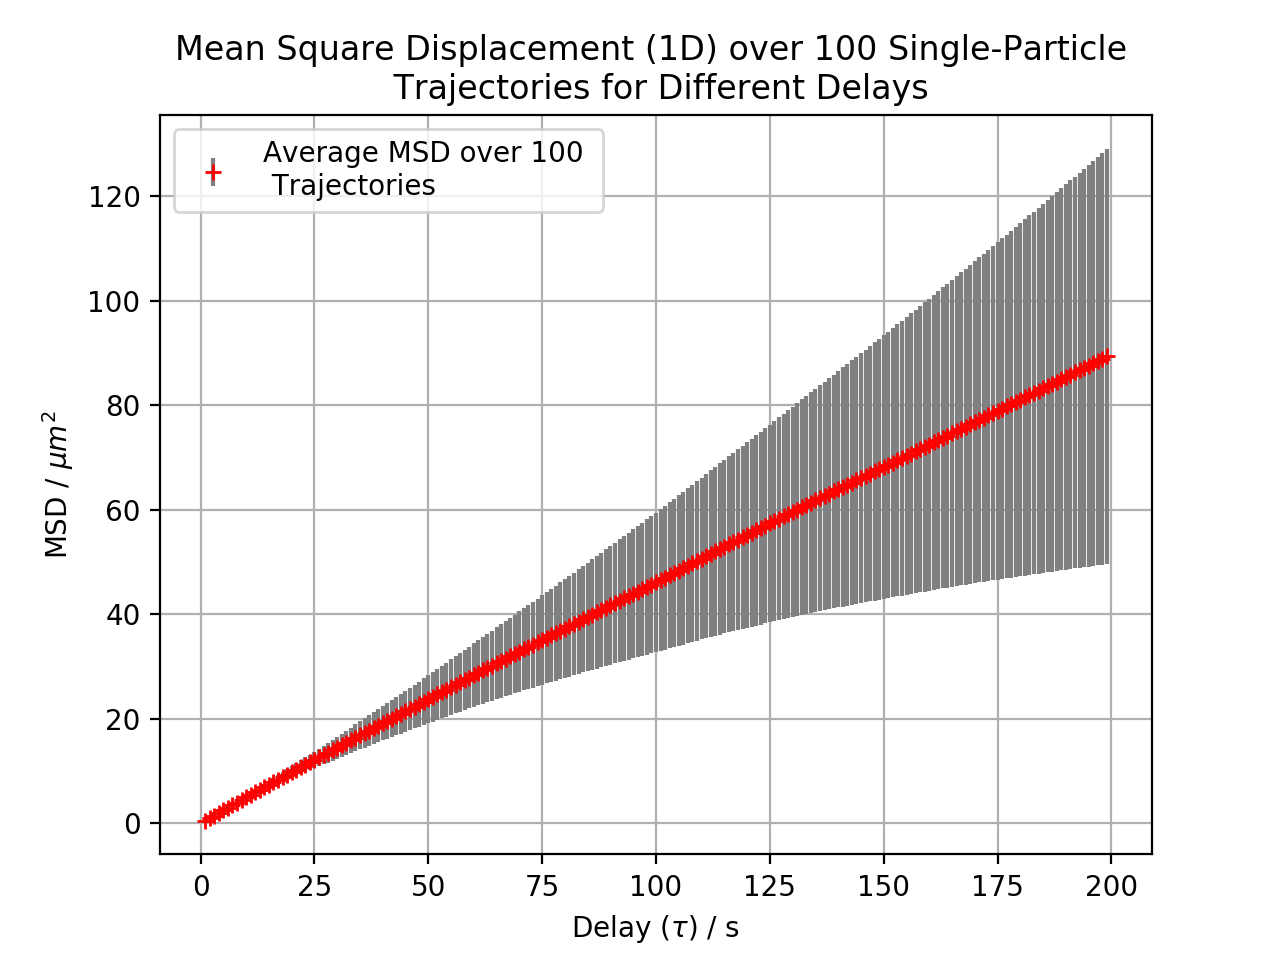

In [7]:
#initialize variables for loop
i = 0
x_arrays_MSD1 = []

#make 100 x_arrays with N=1000 to make average of 100 trajectories for MSD
while i < 100:
    x_arrays_MSD1.append(brownian_motion1D(T_initial,T_final,N_array[1])[0])
    i += 1
    
#initialise array to append different MSD arrays to
MSD_arrays1 = []

#loop to calculate different MSD arrays for each trajectory
for array in x_arrays_MSD1:
    MSD_arrays1.append([np.asarray(MSD_1D(array,tau,dt)[0])*1e12 for tau in tau_array_MSD])

#make an average MSD array of all 100 trajectories
MSD_arrays_average1 = [np.mean(MSD_list) for MSD_list in zip(*MSD_arrays1)]
MSD_error_array1 = [MSD_1D(MSD_arrays1[0],tau,dt)[2] for tau in tau_array_MSD]

#plot linear portion in a figure alongside theoretical curve and linear fit
plt.figure()
plt.grid()
plt.title("Mean Square Displacement (1D) over 100 Single-Particle \n Trajectories for Different Delays")
plt.errorbar(tau_array_MSD[:199],MSD_arrays_average1[:199],yerr=MSD_error_array1[:199],ecolor="gray",fmt= "r+", label="Average MSD over 100 \n Trajectories")
plt.xlabel(r"Delay ($\tau$) / s")
plt.ylabel("MSD / $\mu m^{2}$")
plt.legend(loc="upper left");

As can be seen, the plot above shows a much clearer linear trend than the previous one. Note how even though we used an array with $N=1000$ data points corresponding to $1000s$ of motion, we only plotted the MSD in an interval $\tau \epsilon \left[0,200\right]$ ($20\%$ of the total number of points)  since the error grows very large (see Eq. 7) as $\tau \longrightarrow N$.

Since $\mathsf{M}\mathsf{S}\mathsf{D}(\tau)$ behaves theorectically by Eq. (7), we can use the gradient of the initial (most) linear portion of the plot to calculate the "experimental" diffusion coefficient and compare it with the theoretical value of:

$$ D = \frac{k_{B}T}{\gamma} \tag{8} $$ 

which for the values used for the constants in (8) results in a value for $D$ of:

$$ D = 0.2452 \mu m^{2}s^{-1} $$

Below we use the `numpy.polyfit` function to calculate the polynomial parameters for a linear fit and use the gradient to calculate $D$ through the function:

$$ D = \frac{slope}{2} \tag{9} $$

<IPython.core.display.Javascript object>


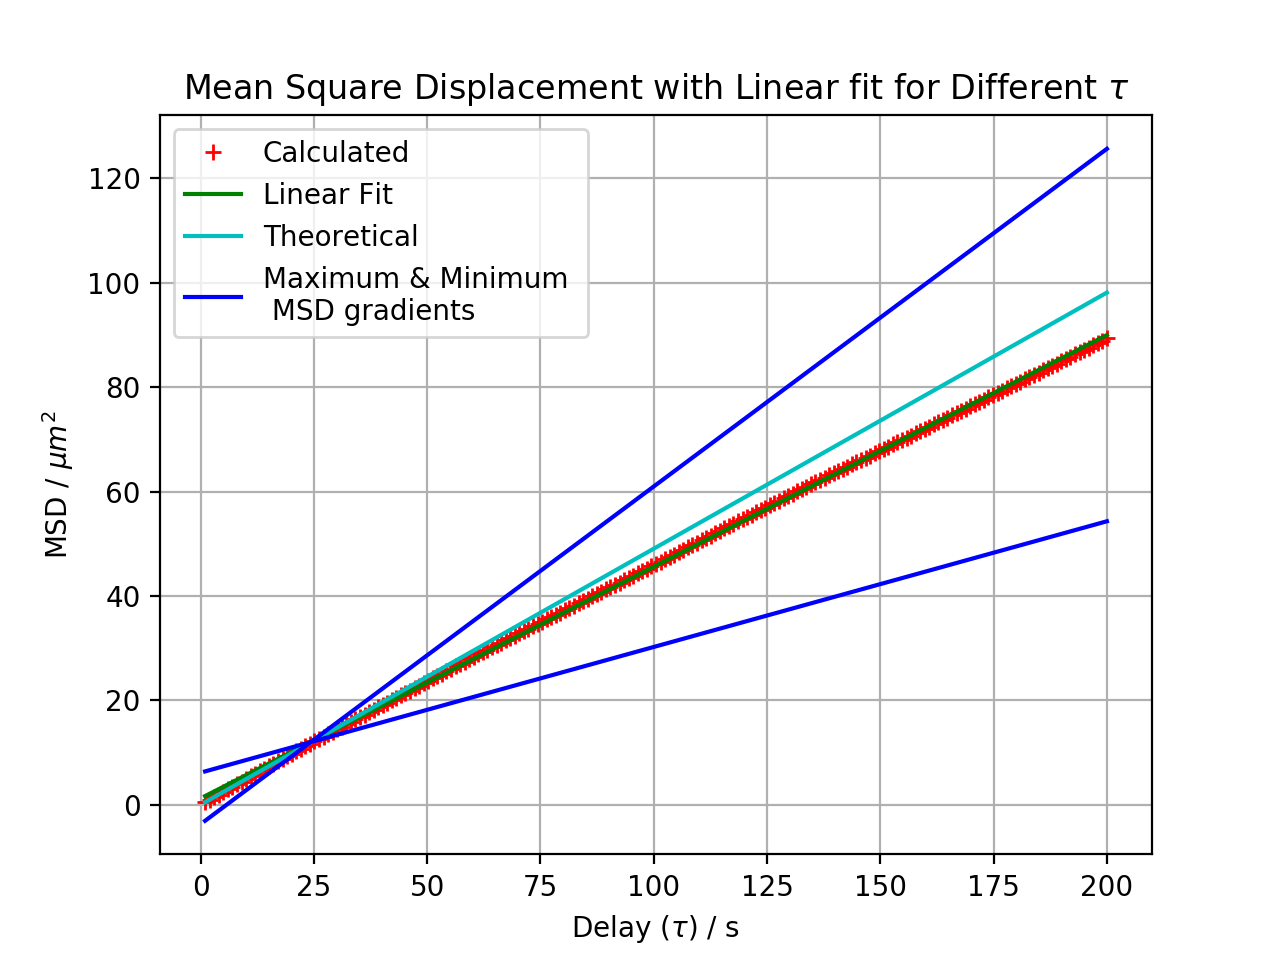

The slope of the MSD average curve:
 0.444 µm^2*s^-1
The slope of the maximum gradient is:
 0.647 µm^2*s^-1
The slope of the minimum gradient is:
 0.241 µm^2*s^-1
The calculated diffusion coefficient is:
 [ 0.22185 ± 0.10150 ] µm^2*s^-1
with percent error:
 45.7 %
The theoretical Diffusion coefficient is:
 0.24525 µm^2*s^-1
Perceived Percent error:
 -9.5 %


In [8]:
#make theoretical MSD array
tau_array_fit = np.linspace(dt,200,len(MSD_arrays_average1[:199]))
MSD_theo1 = [MSD_1D(x_arrays[1],tau,dt)[1] for tau in tau_array_fit] 

#make linear fit
linear_params1 = np.polyfit(tau_array_fit,MSD_arrays_average1[:199],deg=1)
linear_fit1 = linear_params1[0]*tau_array_fit+linear_params1[1]  

#worst-case scenario max and min MSD arrays
min_MSD1 = np.array(MSD_arrays_average1)-np.array(MSD_error_array1)
max_MSD1 = np.array(MSD_arrays_average1)+np.array(MSD_error_array1)

#make maximum and minimum gradients
max_linear_params1 = np.polyfit(tau_array_fit,max_MSD1[:199],deg=1)
max_gradient1 = max_linear_params1[0]*tau_array_fit+max_linear_params1[1]

min_linear_params1 = np.polyfit(tau_array_fit,min_MSD1[:199],deg=1)
min_gradient1 = min_linear_params1[0]*tau_array_fit+min_linear_params1[1]

#make new figure and plot MSD against dt
plt.figure()
plt.grid()
plt.title(r"Mean Square Displacement with Linear fit for Different $\tau$")
plt.plot(tau_array_fit,MSD_arrays_average1[:199],"r+", label="Calculated")
plt.plot(tau_array_fit,linear_fit1,"g", label="Linear Fit")
plt.plot(tau_array_fit,MSD_theo1, "c", label="Theoretical")
plt.plot(tau_array_fit,max_gradient1, "b", label="Maximum & Minimum \n MSD gradients")
plt.plot(tau_array_fit,min_gradient1, "b")
plt.xlabel(r"Delay ($\tau$) / s")
plt.ylabel("MSD / $\mu m^{2}$")
plt.legend(loc="best");
print("The slope of the MSD average curve:\n %0.3f"%linear_params1[0], "µm^2*s^-1")
print("The slope of the maximum gradient is:\n %0.3f"%max_linear_params1[0], "µm^2*s^-1")
print("The slope of the minimum gradient is:\n %0.3f"%min_linear_params1[0], "µm^2*s^-1")
print("The calculated diffusion coefficient is:\n [ {:.5f}".format(linear_params1[0]/2), "± {:.5f}".format((max_linear_params1[0]-min_linear_params1[0])/4), "] µm^2*s^-1")
print("with percent error:\n {:.1f}".format(((max_linear_params1[0]-min_linear_params1[0])*100/2)/linear_params1[0]), "%")
print("The theoretical Diffusion coefficient is:\n {:.5f}".format(D*1e12), "µm^2*s^-1")
print("Perceived Percent error:\n {:.1f}".format((linear_params1[0]/2-D*1e12)*100/(D*1e12)), "%")

### Discussion:

The calculated diffusion coefficient from our data is $D_{exp}=[0.244 \pm 0.101] \mu m^{2}s^{-1}$, while the theoretical one is $D_{theo}=0.24525 \mu m^{2}s^{-1}$. The calculated value thus includes the theoretical one within one $\sigma$. However, the error is quite large at around $41\%$, whereas the calculated coefficient seems to be very accurate with respect to the theoretical value. This is an indicator that we are overestimating the error. Indeed, our method of calculating the error doesn't take into account the fact that as the MSD is averaged over more and more trajectories, its slope converges to a value that would exactly give the theoretical diffusion coefficient. As a means of visualisation of this phenomenon, I have calculated the perceived errors between these two for a different number of averaged trajectories:

10 Trajectories: $ \% \Delta = \frac{0.19297-0.24525}{0.24525}*100 = 21.3\% $

25 Trajectories: $ \% \Delta = \frac{0.28866-0.24525}{0.24525}*100 = 17.7\% $

50 Trajectories: $ \% \Delta = \frac{0.27294-0.24525}{0.24525}*100 = 11.7\% $

100 Trajectories: $ \% \Delta = \frac{0.24403-0.24525}{0.24525}*100 = 0.5\% $

We will now move on to explore the microparticles' Brownian motion in two spatial dimensions and see how it compares to the things investigated so far in 1D.

## Brownian Motion of Microparticle in 2D:

Now that we have explored the motion and MSD of a microparticle suspended in water in one dimension, the next step is to explore its motion in two dimensions, x & y. Below we define the function `brownian_motion2D` that creates both an array for the x and y positions of the microparticle.

In [9]:
def brownian_motion2D(T_initial,T_final,N):
    """Simulates brownian motion in two dimensions.
    Parameters:
    T_initial (float/int): time at which particle movement begins.
    T_final (float/int): time at which particle movement ends.
    N (int): number of discrete time steps.
    
    Output: 
    brownian_xarray (1D NumPy array): array of x values for the Brownian motion of a microparticle.
    brownian_yarray (1D NumPy array): array of x values for the Brownian motion of a microparticle.
    """
    dt = (T_final-T_initial)/N #time step
    
    #w_x and w_y, arrays of random normally distributed numbers with variance 1/dt (st.dev= 1/sqrt(dt))
    #multiplied by an additional factor to have in units of micrometers
    rand_norm_xarray = np.sqrt(2*D*dt)*np.random.normal(0,1/np.sqrt(dt),N)
    rand_norm_yarray = np.sqrt(2*D*dt)*np.random.normal(0,1/np.sqrt(dt),N)
    
    #initialise array for brownian motion with initial condition x(t=0)=0 and y(t=0)=0.
    brownian_xarray = [0] 
    brownian_yarray = [0]
    
    #loop over all random values
    for i in range(N-1):
        brownian_xarray.append(brownian_xarray[i]+rand_norm_xarray[i])
        brownian_yarray.append(brownian_yarray[i]+rand_norm_yarray[i])
        
    return brownian_xarray,brownian_yarray

<IPython.core.display.Javascript object>


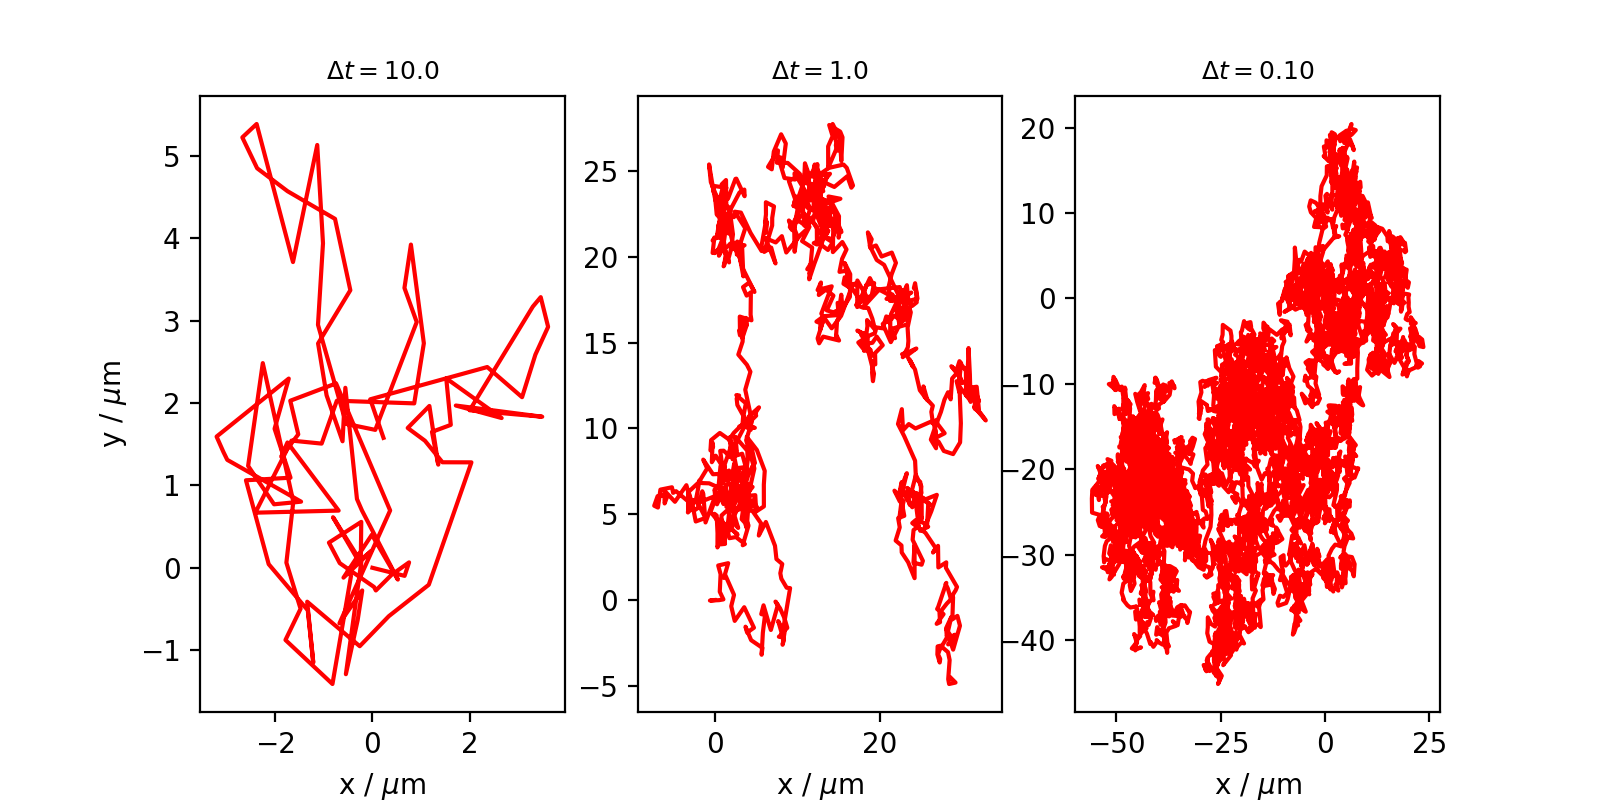

In [10]:
#create x and y brownian motion arrays for N in N_array
x_arrays = [np.asarray(brownian_motion2D(T_initial,T_final,N)[0])*1e06 for N in N_array]
y_arrays = [np.asarray(brownian_motion2D(T_initial,T_final,N)[1])*1e06 for N in N_array]

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(131)
ax1.plot(x_arrays[0],y_arrays[0], "r-")
ax1.set_title("$\Delta t=%0.1f$"%((T_final-T_initial)/N_array[0]), fontsize=9)
ax1.set_xlabel("x / $\mu$m")
ax1.set_ylabel("y / $\mu$m")

ax2 = fig.add_subplot(132)
ax2.plot(x_arrays[1],y_arrays[1], "r-")
ax2.set_title("$\Delta t=%0.1f$"%((T_final-T_initial)/N_array[1]), fontsize=9)
ax2.set_xlabel("x / $\mu$m")

ax3 = fig.add_subplot(133)
ax3.plot(x_arrays[2],y_arrays[2], "r-")
ax3.set_title("$\Delta t=%0.2f$"%((T_final-T_initial)/N_array[2]), fontsize=9)
ax3.set_xlabel("x / $\mu$m");
#plt.savefig("Brownian2D.png")

In the three subplots shown above for Brownian Motion in 2D it is clear that a a larger number of discrete time steps for a constant total time of $T=1000s$ (or a smaller $\Delta t$) results in a more defined movement of the particle. Now that we have shown motion in two dimensions, we can proceed to calculate the MSD for this scenario. 

### Mean Square Displacement in 2D:

Since the particle has an extra dimension to move in, the MSD is calculated from $r$, the distance travelled by the particle in the xy-plane. $r$ can be calculated in a straightworward manner using the particles' initial and final positions on the x and y axes ($\left[ x(t),y(t) \right]$ and $\left[ x(t+\tau),y(t+\tau) \right]$, respectively, where $\tau$ is the time delay between observations) and Pythagoras' Theorem for each time step such that:

$$ r(t) = \sqrt{(x(t+\tau)-x(t))^{2}+(y(t+\tau)-y(t))^{2}} \tag{10} $$

The MSD is then simply:

$$ \mathsf{M}\mathsf{S}\mathsf{D} = \langle r(t)^{2} \rangle \tag{11}$$

for each displacement $r(t)$. In the code cell below we define the function `MSD_2D` that calculates the mean square displacement for Brownian motion in two dimensions. Similarly to the calculation in 1D, the maximum stochastic error in two spatial dimensions follows the equation [3]:

$$ \Delta < 4Dn\Delta t \left[ \frac{2n}{3(N-n+1)} \right]^{1/2} \tag{12}$$

with the only difference being an additional factor of $2$ due to the extra dimension in which the particle moves.

In [11]:
def MSD_2D(x_array,y_array,tau,dt):
    """Gives the 2D mean square displacement for a particle undergoing Brownian motion.
    Parameters:
    x_array (1D NumPy array): array of particle motion in x-direction.
    y_array (1D NumPy array): array of particle motion in y-direction.
    tau (float/int): time delay taken in calculation of MSD. tau <= (T_final-T_initial).
    dt (float): time step taken between particle movements.
    
    Output:
    MSD_exp (float): mean square displacement (meters).
    MSD_theo (float): theoretical mean square displacement (µm^2).
    error_MSD (float): error in the experimental MSD (µm^2).
    """
    #shift in data accounting for delay
    shift = int(np.floor(tau/dt))
    
    #create an array shifted by amount corresponding to delay for each dimension
    shifted_xarray = np.empty_like(x_array)
    shifted_xarray[-shift:] = np.nan
    shifted_xarray[:-shift] = x_array[shift:]
    
    shifted_yarray = np.empty_like(y_array)
    shifted_yarray[-shift:] = np.nan
    shifted_yarray[:-shift] = y_array[shift:]
    
    #difference squared
    diff_sq = np.square(x_array-shifted_xarray)+np.square(y_array-shifted_yarray)

    #mean square dispalcement, calculated and theoretical
    MSD_exp = np.nanmean(diff_sq)
    MSD_theo = 4*D*tau*1e12
    
    #MSD error
    error_MSD = 4*D*shift*dt*(np.sqrt((2*shift)/(3*(len(x_array)-shift+1))))*1e12
    
    return MSD_exp,MSD_theo,error_MSD

<IPython.core.display.Javascript object>


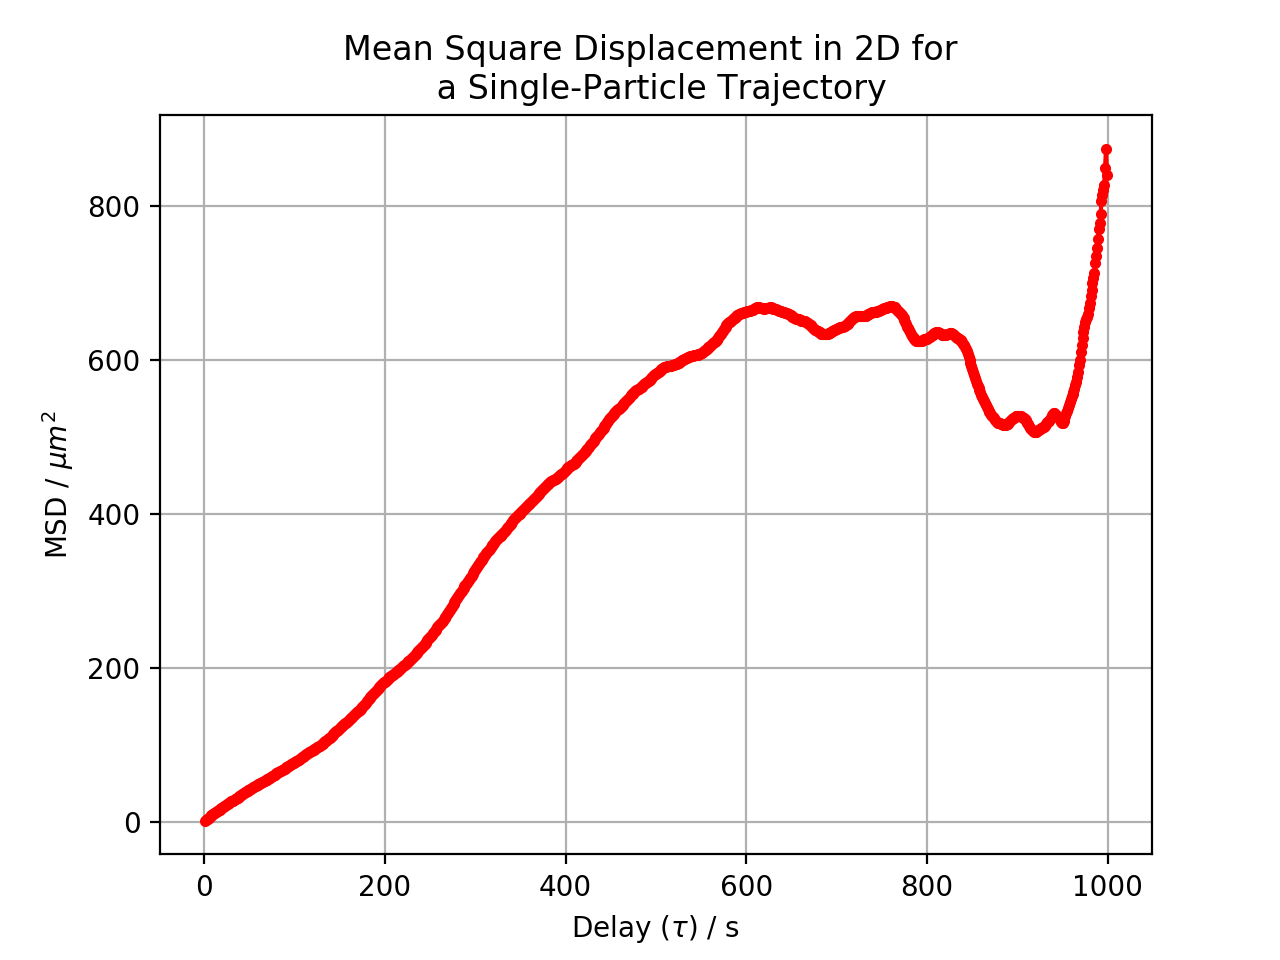

In [12]:
#MSD arrays for different values of T
MSD_exp_array2 = [MSD_2D(x_arrays[1],y_arrays[1],tau,dt)[0] for tau in tau_array_MSD]  
             
#make new figure and plot MSD against dt
plt.figure()
plt.grid()
plt.title("Mean Square Displacement in 2D for \n a Single-Particle Trajectory")
plt.plot(tau_array_MSD,MSD_exp_array2, "r.-")
plt.xlabel(r"Delay ($\tau$) / s")
plt.ylabel("MSD / $\mu m^{2}$");
#plt.savefig("MSD_2D.png")

From the plot above, it is clear that the same problem of only calculating the MSD for one trajectory persists in not being able to show the linearity between MSD and $\tau$. In the cell below we perform the same procedure to calculate an average over 100 single-particle trajectories. 

<IPython.core.display.Javascript object>


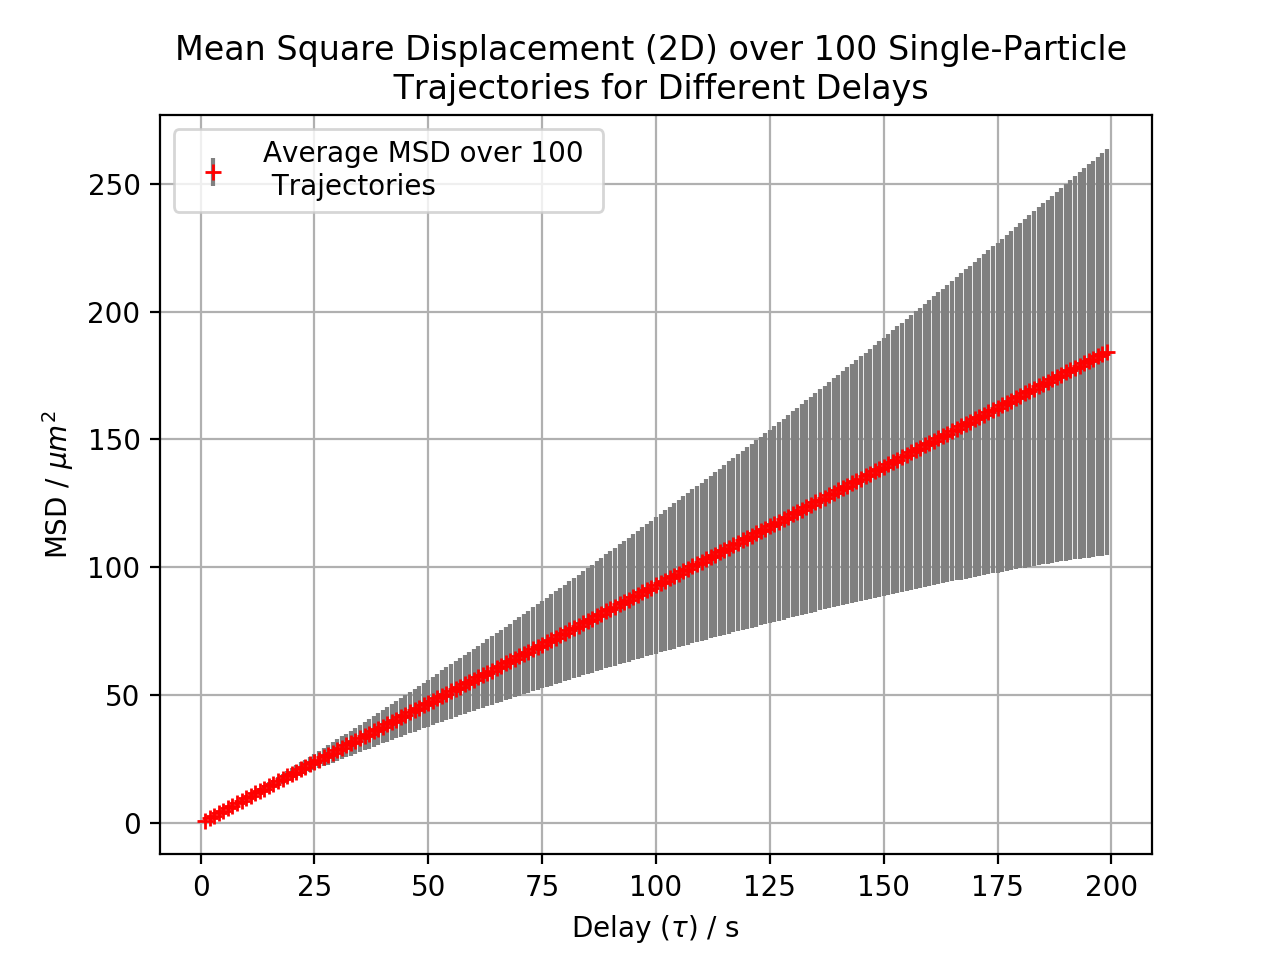

In [13]:
#initialize variables for loop
i = 0
x_arrays_MSD2 = []
y_arrays_MSD2 = []

#make 100 x and y arrays with N=1000 to make average of 100 trajectories for MSD
while i < 100:
    x_arrays_MSD2.append(brownian_motion2D(T_initial,T_final,N_array[1])[0])
    y_arrays_MSD2.append(brownian_motion2D(T_initial,T_final,N_array[1])[1])
    i += 1
    
#initialise array to append different MSD arrays to
MSD_arrays2 = []

#loop to calculate different MSD arrays for each trajectory
for x_array,y_array in zip(x_arrays_MSD2,y_arrays_MSD2):
    MSD_arrays2.append([np.asarray(MSD_2D(x_array,y_array,tau,dt)[0])*1e12 for tau in tau_array_MSD])

#make an average MSD array of all 100 trajectories
MSD_arrays_average2 = [np.mean(MSD_list) for MSD_list in zip(*MSD_arrays2)]
MSD_error_array2 = [MSD_2D(x_arrays_MSD2[0],y_arrays_MSD2[0],tau,dt)[2] for tau in tau_array_MSD]

#plot linear portion in a figure alongside theoretical curve and linear fit
plt.figure()
plt.grid()
plt.title("Mean Square Displacement (2D) over 100 Single-Particle \n Trajectories for Different Delays")
plt.errorbar(tau_array_MSD[:199],MSD_arrays_average2[:199],yerr=MSD_error_array2[:199],ecolor="gray",fmt= "r+", label="Average MSD over 100 \n Trajectories")
plt.xlabel(r"Delay ($\tau$) / s")
plt.ylabel("MSD / $\mu m^{2}$")
plt.legend(loc="upper left");

<IPython.core.display.Javascript object>


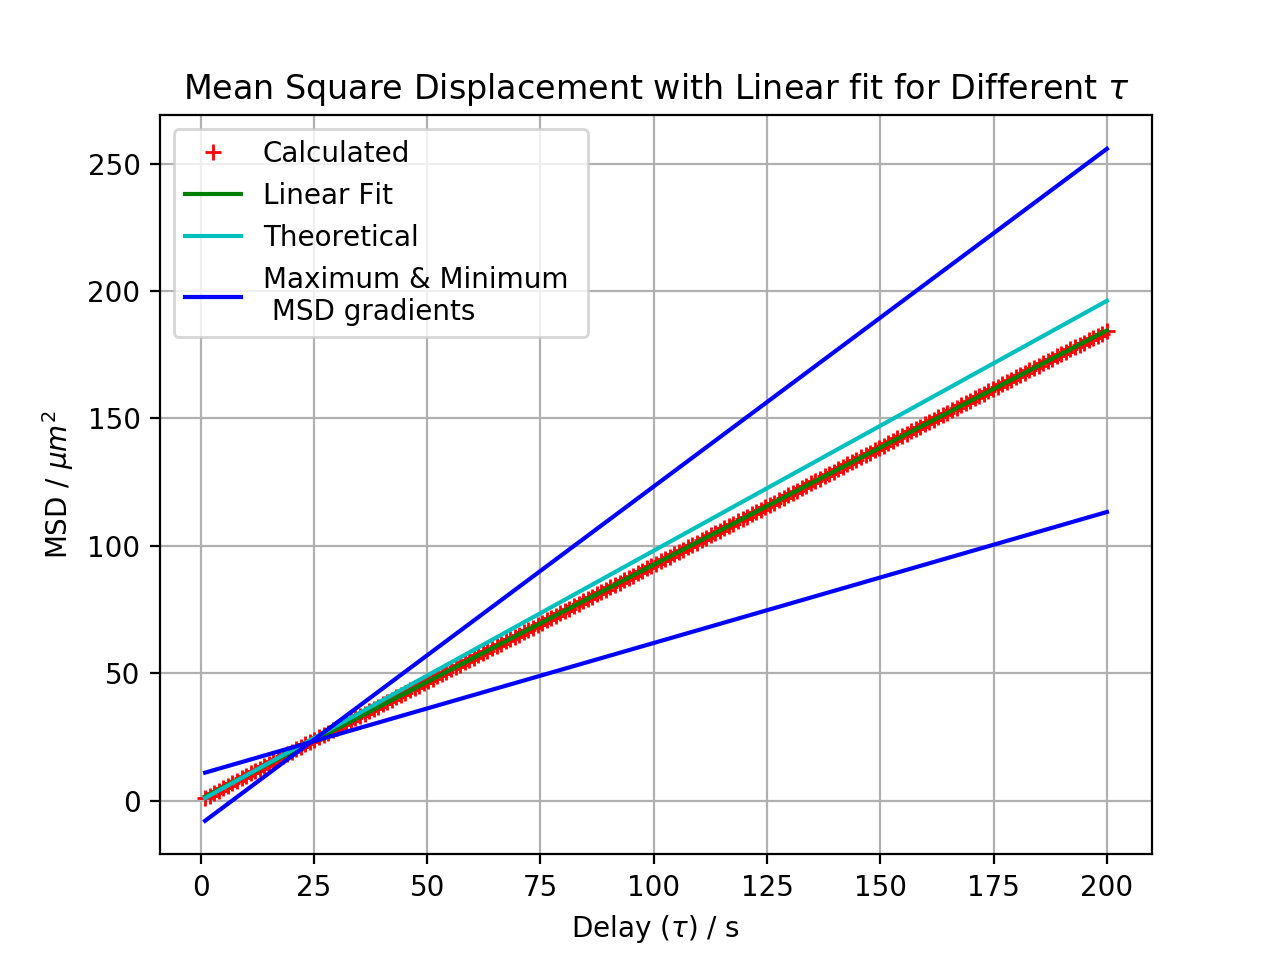

The slope of the linear portion is:
 0.920 µm^2*s^-1
The slope of the maximum gradient is:
 1.326 µm^2*s^-1
The slope of the minimum gradient is:
 0.514 µm^2*s^-1
The calculated diffusion coefficient is:
 [ 0.230 ± 0.101 ] µm^2*s^-1
with percent error:
 44.1 %
The theoretical Diffusion coefficient is:
 0.245 µm^2*s^-1
Perceived Percent error:
 -6.2 %


In [14]:
#make linear fit
MSD_theo2 = [MSD_2D(x_arrays[1],y_arrays[1],tau,dt)[1] for tau in tau_array_fit] 

#calculate linear fit parameters and array
linear_params2 = np.polyfit(tau_array_fit,MSD_arrays_average2[:199],deg=1)
linear_fit2 = linear_params2[0]*tau_array_fit+linear_params2[1]  

#worst-case scenario max and min MSD arrays
min_MSD2 = np.array(MSD_arrays_average2)-np.array(MSD_error_array2)
max_MSD2 = np.array(MSD_arrays_average2)+np.array(MSD_error_array2)

#make maximum and minimum gradients
max_linear_params2 = np.polyfit(tau_array_fit,max_MSD2[:199],deg=1)
max_gradient2 = max_linear_params2[0]*tau_array_fit+max_linear_params2[1]

min_linear_params2 = np.polyfit(tau_array_fit,min_MSD2[:199],deg=1)
min_gradient2 = min_linear_params2[0]*tau_array_fit+min_linear_params2[1]

#make new figure and plot MSD against dt
plt.figure()
plt.grid()
plt.title(r"Mean Square Displacement with Linear fit for Different $\tau$")
plt.plot(tau_array_fit,MSD_arrays_average2[:199],"r+", label="Calculated")
plt.plot(tau_array_fit,linear_fit2,"g", label="Linear Fit")
plt.plot(tau_array_fit,MSD_theo2, "c", label="Theoretical")
plt.plot(tau_array_fit,max_gradient2, "b", label="Maximum & Minimum \n MSD gradients")
plt.plot(tau_array_fit,min_gradient2, "b")
plt.xlabel(r"Delay ($\tau$) / s")
plt.ylabel("MSD / $\mu m^{2}$")
plt.legend(loc="upper left");
print("The slope of the linear portion is:\n %0.3f"%linear_params2[0], "µm^2*s^-1")
print("The slope of the maximum gradient is:\n %0.3f"%max_linear_params2[0], "µm^2*s^-1")
print("The slope of the minimum gradient is:\n %0.3f"%min_linear_params2[0], "µm^2*s^-1")
print("The calculated diffusion coefficient is:\n [ {:.3f}".format(linear_params2[0]/4), "± {:.3f}".format((max_linear_params2[0]-min_linear_params2[0])/8), "] µm^2*s^-1")
print("with percent error:\n {:.1f}".format(((max_linear_params2[0]-min_linear_params2[0])*100/2)/linear_params2[0]), "%")
print("The theoretical Diffusion coefficient is:\n {:.3f}".format(D*1e12), "µm^2*s^-1")
print("Perceived Percent error:\n {:.1f}".format((linear_params2[0]/4-D*1e12)*100/(D*1e12)), "%")

### Discussion:

In the case of a particle moving in two spatial dimensions, the diffusion coefficient is also calculated to be $D_{exp}=[0.2 \pm 0.1] \mu m^{2}s^{-1}$, which also includes the theoretical value within one $\sigma$. However, it also presents quite a large error of about $43\%$. 

Moreover, the plot of MSD against $\tau$ in 2D follows the same pattern as that in 1D. The only observable difference is in the slope of the linear portion of the data. With two spatial dimensions, the calculated slope is $0.947 \mu m^{2}s^{-1}$, whereas with one spatial dimension it was calculated to be $0.490 \mu m^{2}s^{-1}$. It is worth noting that these values vary each time the code is ran since it is calculated from random numbers, but they should always be around the values mentioned. It can be shown that the dependance of the MSD on the number of spatial dimensions, $n$, in in question is:

$$ \mathsf{M}\mathsf{S}\mathsf{D} = 2Dn\tau \tag{13}$$

Hence, our calculations are theoretically accurate since the slope of the plot in 2D is approximately twice as large as that in 1D.

## Conclusion

In this notebook, we have explored the Brownian effects on a microparticle in water. We have considered its motion in one and two spatial dimensions and calculated its mean square displacement as a function of the number of discrete time steps taken. However, we have only considered the particles equation of motion in the absence of inertial effects and a potential. In magnetophoretic control of HOPG microparticles, the particles are subject to a magnetic field gradient and thus to a magnetic potential. Hence, the next step in our exploration will be to investigate the effects of a potential in the particles motion. 

## Applying a Harmonic Potential to the Equation of Motion:

In many cases such as in optical tweezers it is useful to make the particle subject to a potential in order to confine it in a specific region in space. Adding such a term to the Langevin equation results in the following expression [1]:

$$ m\frac{d^{2}}{dt^{2}}r(t) = -\frac{d}{dr}U(r) -\gamma\frac{d}{dt}r(t) + \chi(t) \tag{12} $$

where $U(r)$ is the position-dependent potential. However, we can once again drop the inertail term for the same reasons explained previously, which leaves the equation:

$$ \frac{d}{dt}r(t) = -\frac{1}{\gamma}\frac{d}{dr}U(r) +\xi(t) \tag{13}$$

where $\xi(t)= \sqrt{2D}W(t)$ is a white noise term, with $D$ being the diffusion coefficient. 

Specifically, we are interested in seeing the effects a harmonic potential $U(r) = \frac{1}{2} \vec{k}\cdot\vec{r}^{2} $, where $\vec{k}=\left[ k_{x},k_{y},k_{z} \right]$ is the stiffness of the optical trap in three spatial dimensions and $\vec{r}=\left[ x,y,z \right]$ is the particles' position. Subsituting in this equation into Eq. 13 leaves the final simplified equation:

$$ \dot{r}(t) = -\frac{1}{\gamma}\vec{k}\cdot\vec{r}+\sqrt{2D}\vec{W}(t) \tag{14}$$

where $\vec{W}(t) = \left[ W_{x},W_{y},W_{z} \right] $ is  vector of white noise. In the terms of the finite difference equation for each dimension, we can calculate the particles motion iteratively as (Eq.7.24 in [1]):

$$ x_{i} = x_{i-1}-\frac{k_{x}}{\gamma}x_{i-1}\Delta t+ \sqrt{2D \Delta t} w_{x,i} \tag{15}$$

$$ y_{i} = y_{i-1}-\frac{k_{y}}{\gamma}y_{i-1}\Delta t+ \sqrt{2D \Delta t} w_{y,i} \tag{16}$$

$$ z_{i} = z_{i-1}-\frac{k_{z}}{\gamma}z_{i-1}\Delta t+ \sqrt{2D \Delta t} w_{z,i} \tag{17}$$

In the cells below we define first the stiffness constants in the three spatial dimensions and then a function that calculates the Brownian motion of a particle subject to a harmonic potential in three spatial dimensions.

### Stifness constants:

In [15]:
kx = 1e-8 #N/m
ky = 1e-8 #N/m
kz = 0.2e-8 #N/m

### Define function to calculate Brownian Motion of particle subject to Harmonic Potential:

In [16]:
def optical_trap(T_initial,T_final,N):
    """Simulates motion of Brownian particle in an optical trap where the thermal noise
    drives the particle to move out of the trap but a harmonic restoring force drives it
    towards the center.
    
    Parameters:
    T_initial (float/int): time at which particle movement begins.
    T_final (float/int): time at which particle movement ends.
    N (int): number of discrete time steps.
    
    Output: 
    trap_xarray (1D NumPy array): array of x values for the trapped motion of a microparticle.
    trap_yarray (1D NumPy array): array of y values for the trapped motion of a microparticle.
    trap_zarray (1D NumPy array): array of z values for the trapped motion of a microparticle.
    """
    dt = (T_final-T_initial)/N #time step
    
    #w_x, w_y, and w_z arrays of random normally distributed numbers with variance 1/dt (st.dev= 1/sqrt(dt))
    #multiplied by an additional factor to have in units of micrometers
    rand_norm_xarray = np.sqrt(2*D*dt)*np.random.normal(0,1/np.sqrt(dt),N)
    rand_norm_yarray = np.sqrt(2*D*dt)*np.random.normal(0,1/np.sqrt(dt),N)
    rand_norm_zarray = np.sqrt(2*D*dt)*np.random.normal(0,1/np.sqrt(dt),N)
    
    #initialise array for brownian motion with initial condition x(t=0)=0 and y(t=0)=0.
    trap_xarray = [0] 
    trap_yarray = [0]
    trap_zarray = [0]
    
    #calculate motion in all directions for N-1 time steps
    for i in range(N-1):
        trap_xarray.append(trap_xarray[i]-(kx/gamma)*(trap_xarray[i]*dt)+rand_norm_xarray[i])
        trap_yarray.append(trap_yarray[i]-(ky/gamma)*(trap_yarray[i]*dt)+rand_norm_yarray[i])
        trap_zarray.append(trap_zarray[i]-(kz/gamma)*(trap_zarray[i]*dt)+rand_norm_zarray[i])
        
    return trap_xarray,trap_yarray,trap_zarray
    

<IPython.core.display.Javascript object>


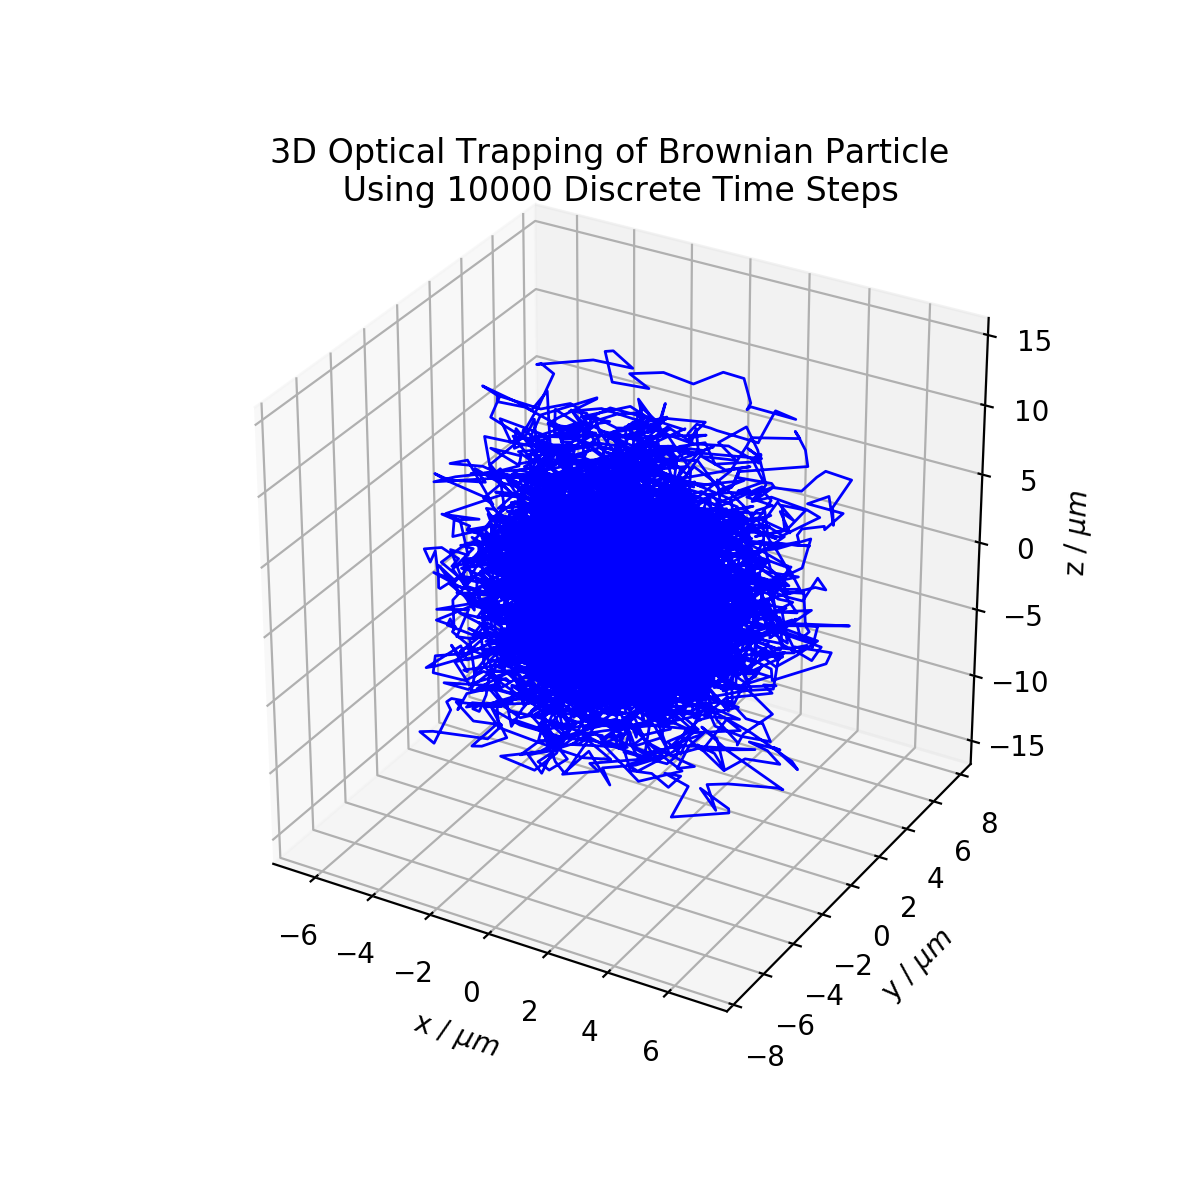

In [17]:
#calculate motion of particle, scale to have in µm
xtrap,ytrap,ztrap = np.asarray(optical_trap(T_initial,T_final,N_array[2]))*1e06

#make figure and plot it in 3d axes
plt.figure(figsize=(6,6))
ax = plt.axes(projection="3d")

ax.plot(xtrap,ytrap,ztrap, c="b", linewidth=1)
ax.set_title("3D Optical Trapping of Brownian Particle \n Using %i Discrete Time Steps"%N_array[2])
ax.set_xlabel("x / $\mu m$")
ax.set_ylabel("y / $\mu m$")
ax.set_zlabel("z / $\mu m$")
plt.show()
#plt.savefig("3D_Trapping.png");

The plot above shows the Brownian particle moves randomly but is confined to a 3D sphere/ellipse due to the presence of the harmonic potential. It is also interesting to calculate the mean square displacement in this situation. In the cell below we define a function to calculate the mean square displacement for an optically trapped particle. In terms of its error, it follows the same pattern as for one and two spatial dimensions such that the error for three spatial dimensions is:

$$ \Delta < 6Dn\Delta t \left[ \frac{2n}{3(N-n+1)} \right]^{1/2} \tag{18}$$

In [18]:
def MSD_trap(x_array,y_array,z_array,tau,dt):
    """Gives the 3D mean square displacement for an optically trapped 
    Brownian particle.
    
    Parameters:
    x_array (1D NumPy array): array of particle motion in x-direction.
    y_array (1D NumPy array): array of particle motion in y-direction.
    z_array (1D NumPy array): array of particle motion in z-direction.
    tau (float/int): time delay taken in calculation of MSD. tau <= (T_final-T_initial).
    dt (float): time step taken between particle movements.
    
    Output:
    MSD_exp (float): experimental mean square displacement (µm^2).
    error_MSD (float): error in the experimental MSD (µm^2).
    """
    #shift in data accounting for delay
    shift = int(np.floor(tau/dt))
    
    #create an array shifted by amount corresponding to delay for each dimension
    shifted_xarray = np.empty_like(x_array)
    shifted_xarray[-shift:] = np.nan
    shifted_xarray[:-shift] = x_array[shift:]
    
    shifted_yarray = np.empty_like(y_array)
    shifted_yarray[-shift:] = np.nan
    shifted_yarray[:-shift] = y_array[shift:]
        
    shifted_zarray = np.empty_like(z_array)
    shifted_zarray[-shift:] = np.nan
    shifted_zarray[:-shift] = z_array[shift:]
    
    #difference squared
    diff_sq = np.square(x_array-shifted_xarray)+np.square(y_array-shifted_yarray)+np.square(z_array-shifted_zarray)

    #mean square dispalcement
    MSD_exp = np.nanmean(diff_sq)
    
    #MSD error
    error_MSD = 4*D*shift*dt*(np.sqrt((2*shift)/(3*(len(x_array)-shift+1))))*1e12
    
    return MSD_exp,error_MSD

<IPython.core.display.Javascript object>


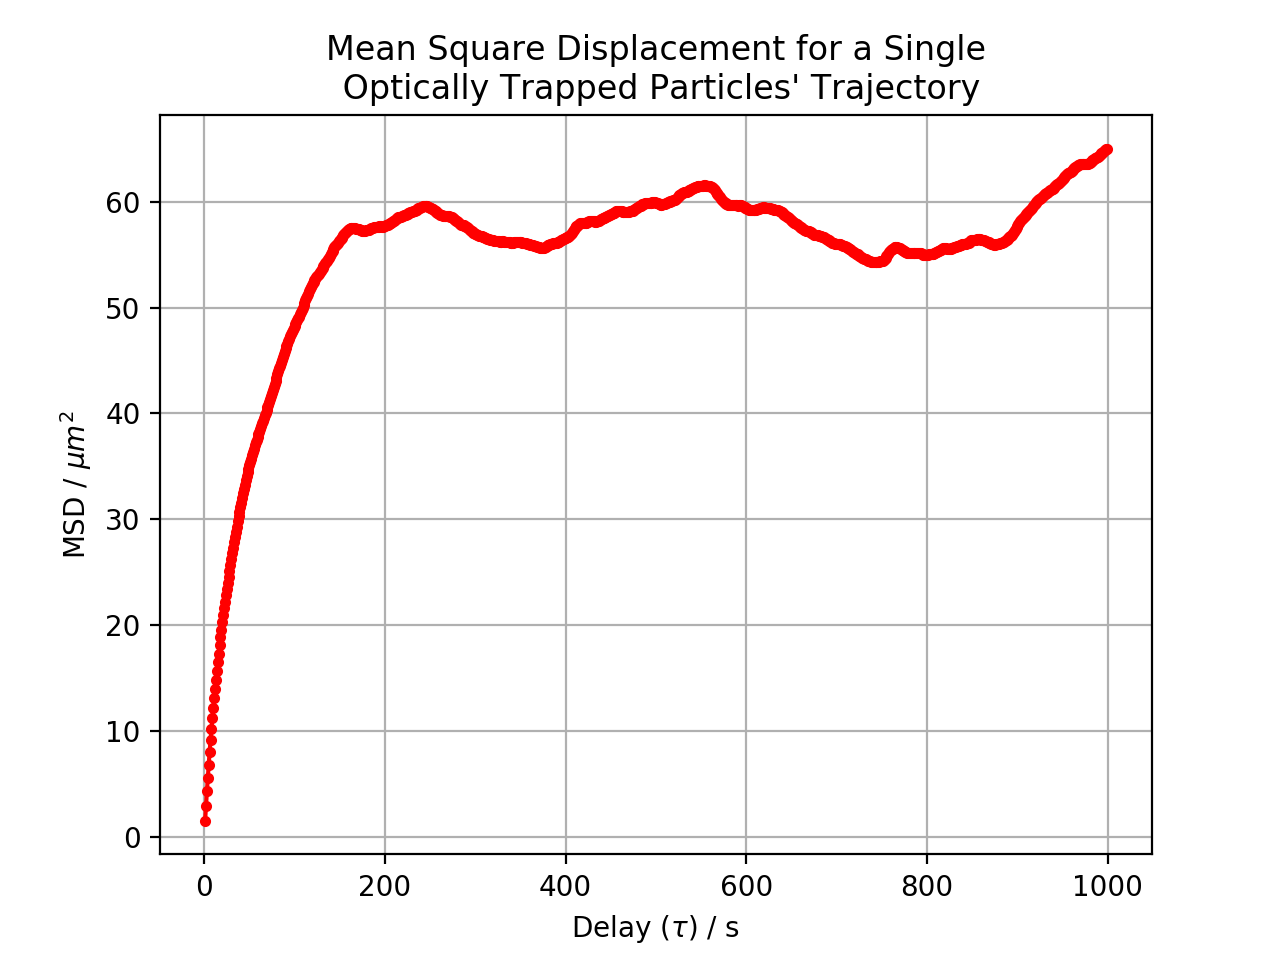

In [19]:
#MSD arrays for different values of tau
MSD_exp_array3 = [MSD_trap(xtrap,ytrap,ztrap,tau,dt)[0] for tau in tau_array_MSD]  
             
#make new figure and plot MSD against dt
plt.figure()
plt.grid()
plt.title("Mean Square Displacement for a Single\n Optically Trapped Particles' Trajectory")
plt.plot(tau_array_MSD,MSD_exp_array3, "r.-")
plt.xlabel(r"Delay ($\tau$) / s")
plt.ylabel("MSD / $\mu m^{2}$");
#plt.savefig("MSD_2D.png")

As could have been expected, the MSD curve shows how the MSD increases at first and then plateau's for large delays, since the particle can only move within a specific volume. Below we calculate the average MSD over 50 different particle trajectories to obtain a more precise plot of MSD against $\tau$.

<IPython.core.display.Javascript object>


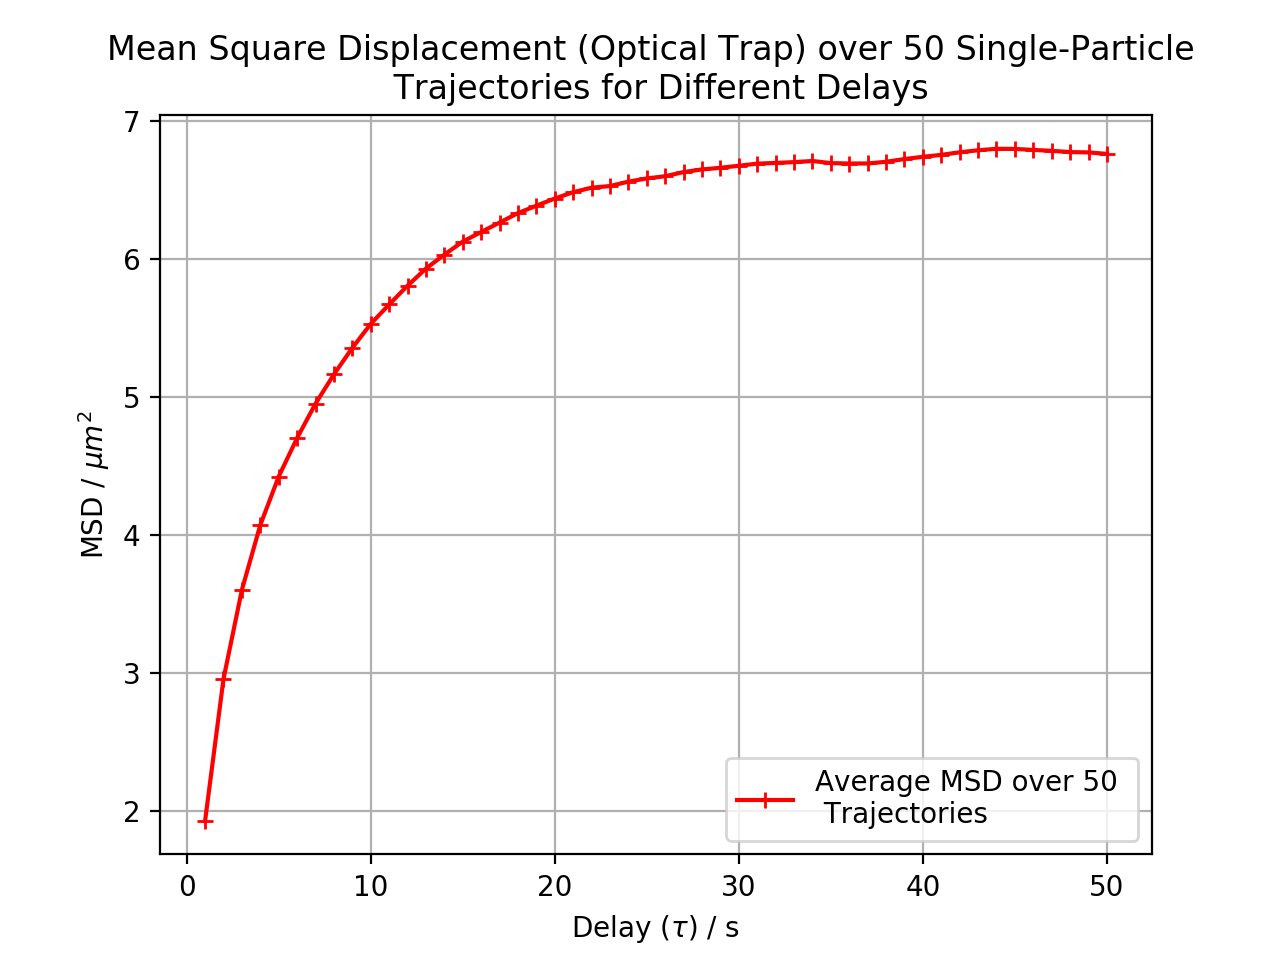

In [20]:
#initialize variables for loop
i = 0
x_arrays_trap = []
y_arrays_trap = []
z_arrays_trap = []

#make 50 x,y, and z arrays with N=1000 to make average of 50 trajectories for MSD
while i < 50:
    x_arrays_trap.append(optical_trap(T_initial,T_final,N_array[1])[0])
    y_arrays_trap.append(optical_trap(T_initial,T_final,N_array[1])[1])
    z_arrays_trap.append(optical_trap(T_initial,T_final,N_array[1])[2])
    i += 1
    
#initialise array to append different MSD arrays to
MSD_arrays3 = []

#loop to calculate different MSD arrays for each trajectory
for x_array,y_array,z_array in zip(x_arrays_trap,y_arrays_trap,z_arrays_trap):
    MSD_arrays3.append([np.asarray(MSD_trap(x_array,y_array,z_array,tau,dt)[0])*1e12 for tau in tau_array_MSD])

#make an average MSD array of all 50 trajectories
MSD_arrays_average3 = [np.mean(MSD_list) for MSD_list in zip(*MSD_arrays3)]
#MSD_error_array3 = [MSD_trap(x_arrays_trap[0],y_arrays_trap[0],z_arrays_trap[0],tau,dt)[2] for tau in tau_array_MSD]

#plot linear portion in a figure alongside theoretical curve and linear fit
plt.figure()
plt.grid()
plt.title("Mean Square Displacement (Optical Trap) over 50 Single-Particle \n Trajectories for Different Delays")
plt.plot(tau_array_MSD[:50],MSD_arrays_average3[:50],"r+-", label="Average MSD over 50 \n Trajectories")
plt.xlabel(r"Delay ($\tau$) / s")
plt.ylabel("MSD / $\mu m^{2}$")
plt.legend(loc="lower right");

By averaging 50 trajectories, the curve becomes more defined and it is clear that the MSD plateaus after a certain delay due to the trapping of the particle.

## Bibliography

[1]. Jones, P., Maragò, O. and Volpe, G., 2015. Optical Tweezers (pp. 188-218). Cambridge: Cambridge University Press.

[2]. G. Volpe and G. Volpe, “Simulation of a Brownian particle in an optical trap,” American Journal of Physics, vol. 81, no. 3, pp. 224–230, 2013.

[3]. H. Qian, M. Sheetz, and E. Elson, “Single particle tracking. Analysis of diffusion and flow in two-dimensional systems”, Biophysical Journal, vol. 60, no. 4. pp. 910-921, 1991, doi: 10.1016/s0006-3495(91)82125-7.